In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Data-Melbourne_F_fixed.csv')

In [ ]:
print(f"Data Display: \n {df.head()}\n\n Data Size: {df.shape}\n\n Null Check: \n{df.isnull().sum()}")

Data Display: 
    Unnamed: 0  Average Outflow  Average Inflow  Energy Consumption  Ammonia  \
0           0            2.941           2.589            175856.0     27.0   
1           1            2.936           2.961            181624.0     25.0   
2           2            2.928           3.225            202016.0     42.0   
3           3            2.928           3.354            207547.0     36.0   
4           4            2.917           3.794            202824.0     46.0   

   Biological Oxygen Demand  Chemical Oxygen Demand  Total Nitrogen  \
0                     365.0                   730.0          60.378   
1                     370.0                   740.0          60.026   
2                     418.0                   836.0          64.522   
3                     430.0                   850.0          63.000   
4                     508.0                  1016.0          65.590   

   Average Temperature  Maximum temperature  Minimum temperature  \
0             

In [ ]:
columns = df.columns.tolist()

In [ ]:
import matplotlib.pyplot as plt

# for col in columns:
#   plt.plot(df[col])
#   plt.show()

# columns 11(Atmospheric pressure) and 14(Average visibility) have const value with one outlier

In [ ]:
df = df.drop(columns=['Average humidity', 'Atmospheric pressure', 'Average visibility'])

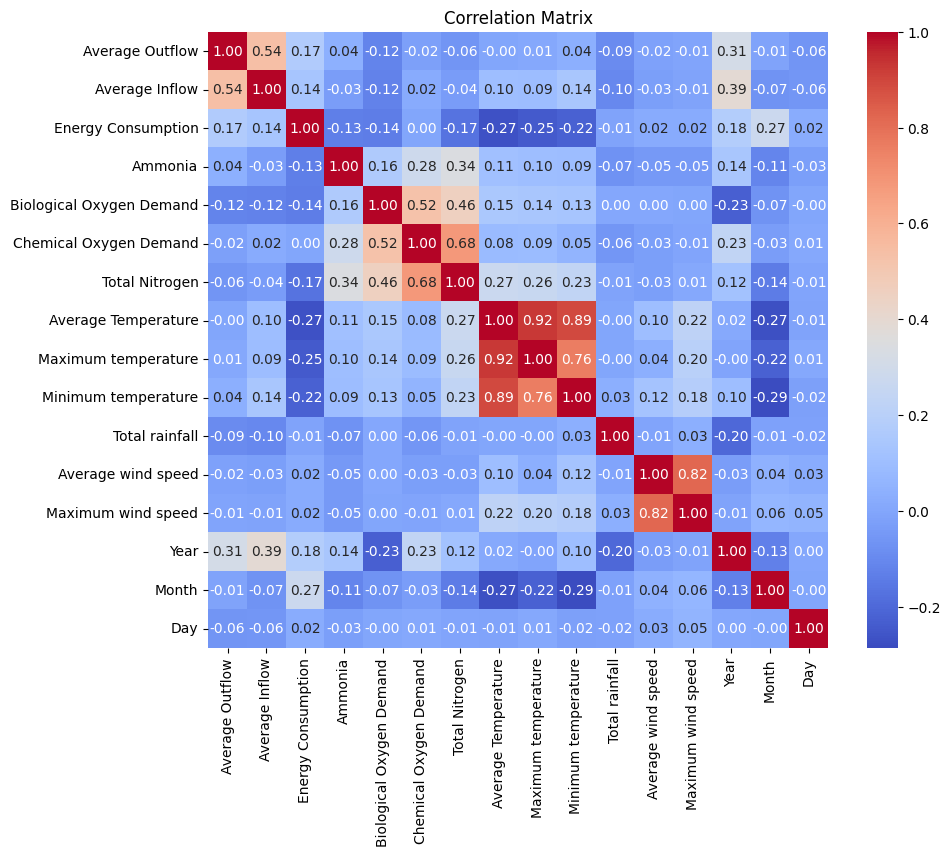

In [ ]:
import seaborn as sns

df_x = df.copy()
df_x = df_x.drop(columns=['Unnamed: 0'])
correlation_matrix = df_x.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
df_x.corr().sum()

,0
Average Outflow,1.714228
Average Inflow,1.968036
Energy Consumption,0.630881
Ammonia,1.799234
Biological Oxygen Demand,1.899373
Chemical Oxygen Demand,2.824280
Total Nitrogen,2.911515
Average Temperature,3.309781
Maximum temperature,3.134239
Minimum temperature,3.243305


In [ ]:
# removing -ve correlation, "Energy Consumption" has the lowest correlation, suggesting that it can be a dependent variable

In [ ]:
for column in df_x.columns:
    print(f"Unique values in '{column}': {len(df_x[column].unique())}")

Unique values in 'Average Outflow': 1052
Unique values in 'Average Inflow': 1093
Unique values in 'Energy Consumption': 1379
Unique values in 'Ammonia': 48
Unique values in 'Biological Oxygen Demand': 214
Unique values in 'Chemical Oxygen Demand': 221
Unique values in 'Total Nitrogen': 355
Unique values in 'Average Temperature': 230
Unique values in 'Maximum temperature': 195
Unique values in 'Minimum temperature': 162
Unique values in 'Total rainfall': 32
Unique values in 'Average wind speed': 198
Unique values in 'Maximum wind speed': 49
Unique values in 'Year': 6
Unique values in 'Month': 12
Unique values in 'Day': 31


In [ ]:
df_x['Energy Consumption'] = df_x['Energy Consumption']/1000.0
# to KWh

In [ ]:
df_x.columns

Index(['Average Outflow', 'Average Inflow', 'Energy Consumption', 'Ammonia',
       'Biological Oxygen Demand', 'Chemical Oxygen Demand', 'Total Nitrogen',
       'Average Temperature', 'Maximum temperature', 'Minimum temperature',
       'Total rainfall', 'Average wind speed', 'Maximum wind speed', 'Year',
       'Month', 'Day'],
      dtype='object')

In [ ]:
df_x.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Total rainfall,Average wind speed,Maximum wind speed,Year,Month,Day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275.159089,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,0.218090,19.482706,35.381259,2016.258321,6.184515,15.584660
std,1.228778,1.439583,44.640534,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,1.306923,7.136868,11.626362,1.583491,3.410588,8.741422
min,0.000004,2.589000,116.638000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,3.074500,3.643250,246.435750,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,14.400000,27.800000,2015.000000,3.000000,8.000000
50%,3.701000,4.161500,275.808000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,18.100000,33.500000,2016.000000,6.000000,15.000000
75%,4.498750,4.847750,305.703750,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,23.300000,42.400000,2018.000000,9.000000,23.000000
max,7.920000,18.968000,398.328000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,18.030000,49.100000,83.500000,2019.000000,12.000000,31.000000


In [ ]:
# making a new data column for prediction (classification task)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# the weight factor is the sum of that row of correlation matrix

weights = {
    "Average Outflow": 1.714228,
    "Average Inflow": 1.968036,
    "Energy Consumption": 0.630881,
    "Ammonia": 1.799234,
    "Biological Oxygen Demand": 1.899373,
    "Chemical Oxygen Demand": 2.824280,
    "Total Nitrogen": 2.911515,
    "Average Temperature": 3.309781,
    "Maximum temperature": 3.134239,
    "Minimum temperature": 3.243305,
    "Total rainfall": 0.469241,
    "Average wind speed": 1.989945,
    "Maximum wind speed": 2.513098
}

df['Weighted_Avg'] = sum(df[col] * weight for col, weight in weights.items())
df['Normalized_Weighted_Avg'] = (df['Weighted_Avg'] - df['Weighted_Avg'].min()) / (
    df['Weighted_Avg'].max() - df['Weighted_Avg'].min()
)

In [ ]:
df.head()

,Unnamed: 0,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Total rainfall,Average wind speed,Maximum wind speed,Year,Month,Day,Weighted_Avg,Normalized_Weighted_Avg
0,0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,1.52,26.9,53.5,2014.0,1.0,1.0,114305.819566,0.213282
1,1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.00,14.4,27.8,2014.0,1.0,2.0,117875.451011,0.233245
2,2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.25,31.9,61.1,2014.0,1.0,5.0,131264.426414,0.308121
3,3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.00,27.0,38.9,2014.0,1.0,6.0,134712.828090,0.327406
4,4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.00,20.6,35.2,2014.0,1.0,7.0,132337.971459,0.314125


In [ ]:
def classify(row):
    if row < 0.33:
        return 'Low'
    elif row < 0.66:
        return 'Medium'
    else:
        return 'High'

df['Category'] = df['Normalized_Weighted_Avg'].apply(classify)

X = df[['Average Outflow', 'Average Inflow', 'Energy Consumption', 'Ammonia',
       'Biological Oxygen Demand', 'Chemical Oxygen Demand', 'Total Nitrogen',
       'Average Temperature', 'Maximum temperature', 'Minimum temperature',
       'Total rainfall', 'Average wind speed', 'Maximum wind speed']]

y = df['Category'].map({'Low': 0, 'Medium': 1, 'High': 2})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (Weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

lr_param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs'], 'max_iter': [500]}

lr_grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    lr_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

lr_grid_search.fit(X_train_norm, y_train)

print("\nBest Parameters for Logistic Regression:", lr_grid_search.best_params_)

y_pred_lr_tuned = lr_grid_search.best_estimator_.predict(X_test_norm)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (Weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

print("\nDetailed Results for Each Iteration:\n")
results = lr_grid_search.cv_results_
print(f"{'C':<10} {'Solver':<10} {'Max Iter':<10} {'Mean Accuracy':<15}")
print("="*50)

for i in range(len(results['params'])):
    params = results['params'][i]
    mean_accuracy = results['mean_test_score'][i]
    print(f"{params['C']:<10} {params['solver']:<10} {params['max_iter']:<10} {mean_accuracy:<15.4f}")

evaluate_model(y_test, y_pred_lr_tuned, "Logistic Regression (Tuned)")


Best Parameters for Logistic Regression: {'C': 100, 'max_iter': 500, 'solver': 'lbfgs'}

Detailed Results for Each Iteration:

C          Solver     Max Iter   Mean Accuracy  
0.01       liblinear  500        0.8471         
0.01       lbfgs      500        0.8335         
0.1        liblinear  500        0.8833         
0.1        lbfgs      500        0.9367         
1          liblinear  500        0.9158         
1          lbfgs      500        0.9747         
10         liblinear  500        0.9566         
10         lbfgs      500        0.9810         
100        liblinear  500        0.9765         
100        lbfgs      500        0.9855         

Logistic Regression (Tuned) Evaluation:
Accuracy: 0.9892
F1 Score (Weighted): 0.9893

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.98      0.99       182
           2       0.99      1.00      0.99        75

    a

In [39]:
class LogisticRegressionScratch:
    def __init__(self, C=1.0, solver='lbfgs', max_iter=500):
        self.C = C
        self.solver = solver
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        return -np.sum(y_true * np.log(y_pred + 1e-15)) / m + self.C * np.sum(self.weights**2)

    def one_hot_encode(self, y, num_classes):
        m = y.shape[0]
        encoded = np.zeros((m, num_classes))
        encoded[np.arange(m), y] = 1
        return encoded

    def fit(self, X, y):
        m, n = X.shape
        num_classes = len(np.unique(y))
        y_one_hot = self.one_hot_encode(y, num_classes)

        self.weights = np.zeros((n, num_classes))
        self.bias = np.zeros((1, num_classes))

        for i in range(self.max_iter):
            scores = np.dot(X, self.weights) + self.bias
            probs = self.softmax(scores)

            dw = (1 / m) * np.dot(X.T, (probs - y_one_hot)) + (2 * self.C * self.weights)
            db = (1 / m) * np.sum(probs - y_one_hot, axis=0, keepdims=True)

            self.weights -= 0.01 * dw
            self.bias -= 0.01 * db

    def predict(self, X):
        scores = np.dot(X, self.weights) + self.bias
        probs = self.softmax(scores)
        return np.argmax(probs, axis=1)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = np.mean(y_true == y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (Weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=1))

lr_param_grid = {
    'C': [0.00001, 0.0001, 0.001, 0.01, 0.11],
    'solver': ['lbfgs'],
    'max_iter': [5000]
}

best_accuracy = 0
best_params = None
results = []

print("\nDetailed Results for Each Iteration:\n")
print(f"{'C':<10} {'Solver':<10} {'Max Iter':<10} {'Mean Accuracy':<15}")
print("=" * 50)

for C in lr_param_grid['C']:
    for max_iter in lr_param_grid['max_iter']:
        model = LogisticRegressionScratch(C=C, max_iter=max_iter)
        model.fit(X_train_norm, y_train)

        y_pred_train = model.predict(X_train_norm)
        accuracy = np.mean(y_train == y_pred_train)

        results.append({'C': C, 'solver': 'lbfgs', 'max_iter': max_iter, 'accuracy': accuracy})

        print(f"{C:<10} {'lbfgs':<10} {max_iter:<10} {accuracy:<15.4f}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'C': C, 'solver': 'lbfgs', 'max_iter': max_iter}
            best_model = model

y_pred_test = best_model.predict(X_test_norm)
evaluate_model(y_test, y_pred_test, "Logistic Regression (Tuned)")

print("\nBest Parameters for Logistic Regression:", best_params)


Detailed Results for Each Iteration:

C          Solver     Max Iter   Mean Accuracy  
1e-05      lbfgs      5000       0.9457         
0.0001     lbfgs      5000       0.9457         
0.001      lbfgs      5000       0.9439         
0.01       lbfgs      5000       0.9213         
0.11       lbfgs      5000       0.7982         

Logistic Regression (Tuned) Evaluation:
Accuracy: 0.9170
F1 Score (Weighted): 0.9104

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62        20
           1       0.90      0.98      0.94       182
           2       0.96      0.88      0.92        75

    accuracy                           0.92       277
   macro avg       0.95      0.77      0.83       277
weighted avg       0.92      0.92      0.91       277


Best Parameters for Logistic Regression: {'C': 1e-05, 'solver': 'lbfgs', 'max_iter': 5000}


In [ ]:
n_neighbors_values = [3, 5, 7, 9]
weights_values = ['uniform', 'distance']
metric_values = ['euclidean', 'manhattan']

results = []

print("\nDetailed Results for Each Iteration:\n")
print(f"{'Neighbors':<12} {'Weights':<10} {'Metric':<12} {'Mean Accuracy':<15}")
print("="*60)

for n_neighbors, weights, metric in product(n_neighbors_values, weights_values, metric_values):
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    model.fit(X_train_norm, y_train)

    y_pred_train = model.predict(X_train_norm)

    accuracy = accuracy_score(y_train, y_pred_train)

    results.append({
        'n_neighbors': n_neighbors,
        'weights': weights,
        'metric': metric,
        'accuracy': accuracy,
        'model': model
    })

    print(f"{n_neighbors:<12} {weights:<10} {metric:<12} {accuracy:<15.4f}")

best_result = max(results, key=lambda x: x['accuracy'])
best_model = best_result['model']

print("\nBest Parameters for KNN:")
print(f"n_neighbors: {best_result['n_neighbors']}, Weights: {best_result['weights']}, Metric: {best_result['metric']}")

y_pred_best = best_model.predict(X_test_norm)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (Weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_best, "K-Nearest Neighbors (Tuned)")


Detailed Results for Each Iteration:

Neighbors    Weights    Metric       Mean Accuracy  
3            uniform    euclidean    0.9158         
3            uniform    manhattan    0.9041         
3            distance   euclidean    1.0000         
3            distance   manhattan    1.0000         
5            uniform    euclidean    0.9032         
5            uniform    manhattan    0.9032         
5            distance   euclidean    1.0000         
5            distance   manhattan    1.0000         
7            uniform    euclidean    0.8869         
7            uniform    manhattan    0.8905         
7            distance   euclidean    1.0000         
7            distance   manhattan    1.0000         
9            uniform    euclidean    0.8851         
9            uniform    manhattan    0.8869         
9            distance   euclidean    1.0000         
9            distance   manhattan    1.0000         

Best Parameters for KNN:
n_neighbors: 3, Weights: distance,

In [ ]:
max_depth_values = [None, 10, 20, 30]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

results = []

print("\nDetailed Results for Each Iteration:\n")
print(f"{'Max Depth':<12} {'Min Split':<12} {'Min Leaf':<12} {'Mean Accuracy':<15}")
print("="*60)

for max_depth, min_samples_split, min_samples_leaf in product(max_depth_values, min_samples_split_values, min_samples_leaf_values):
    model = DecisionTreeClassifier(
        random_state=42,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_train)

    results.append({
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'accuracy': accuracy,
        'model': model
    })

    print(f"{str(max_depth):<12} {min_samples_split:<12} {min_samples_leaf:<12} {accuracy:<15.4f}")

best_result = max(results, key=lambda x: x['accuracy'])
best_model = best_result['model']

print("\nBest Parameters for Decision Tree:")
print(f"Max Depth: {best_result['max_depth']}, Min Split: {best_result['min_samples_split']}, Min Leaf: {best_result['min_samples_leaf']}")

y_pred_best = best_model.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (Weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_best, "Decision Tree (Tuned)")


Detailed Results for Each Iteration:

Max Depth    Min Split    Min Leaf     Mean Accuracy  
None         2            1            1.0000         
None         2            2            1.0000         
None         2            4            0.9982         
None         5            1            1.0000         
None         5            2            1.0000         
None         5            4            0.9982         
None         10           1            0.9982         
None         10           2            0.9982         
None         10           4            0.9982         
10           2            1            1.0000         
10           2            2            1.0000         
10           2            4            0.9982         
10           5            1            1.0000         
10           5            2            1.0000         
10           5            4            0.9982         
10           10           1            0.9982         
10           10           

In [ ]:
n_estimators_values = [50, 100, 200]
max_depth_values = [None, 10, 20, 30]
min_samples_split_values = [2, 5, 10]

results = []

print("\nDetailed Results for Each Iteration:\n")
print(f"{'N Estimators':<15} {'Max Depth':<12} {'Min Split':<12} {'Mean Accuracy':<15}")
print("="*60)

for n_estimators, max_depth, min_samples_split in product(n_estimators_values, max_depth_values, min_samples_split_values):
    model = RandomForestClassifier(
        random_state=42,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split
    )
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_train)

    results.append({
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'accuracy': accuracy,
        'model': model
    })

    print(f"{n_estimators:<15} {str(max_depth):<12} {min_samples_split:<12} {accuracy:<15.4f}")

best_result = max(results, key=lambda x: x['accuracy'])
best_model = best_result['model']

print("\nBest Parameters for Random Forest:")
print(f"N Estimators: {best_result['n_estimators']}, Max Depth: {best_result['max_depth']}, Min Split: {best_result['min_samples_split']}")

y_pred_best = best_model.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (Weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_best, "Random Forest (Tuned)")


Detailed Results for Each Iteration:

N Estimators    Max Depth    Min Split    Mean Accuracy  
50              None         2            1.0000         
50              None         5            1.0000         
50              None         10           1.0000         
50              10           2            1.0000         
50              10           5            1.0000         
50              10           10           1.0000         
50              20           2            1.0000         
50              20           5            1.0000         
50              20           10           1.0000         
50              30           2            1.0000         
50              30           5            1.0000         
50              30           10           1.0000         
100             None         2            1.0000         
100             None         5            1.0000         
100             None         10           1.0000         
100             10           2   

In [ ]:
C_values = [0.1, 1, 10]
kernel_values = ['linear', 'rbf', 'poly']
gamma_values = ['scale', 'auto']

results = []

print("\nDetailed Results for Each Iteration:\n")
print(f"{'C':<10} {'Kernel':<12} {'Gamma':<8} {'Mean Accuracy':<15}")
print("="*60)

for C, kernel, gamma in product(C_values, kernel_values, gamma_values):
    model = SVC(
        random_state=42,
        C=C,
        kernel=kernel,
        gamma=gamma
    )
    model.fit(X_train_norm, y_train)

    y_pred_train = model.predict(X_train_norm)
    accuracy = accuracy_score(y_train, y_pred_train)

    results.append({
        'C': C,
        'kernel': kernel,
        'gamma': gamma,
        'accuracy': accuracy,
        'model': model
    })

    print(f"{C:<10} {kernel:<12} {gamma:<8} {accuracy:<15.4f}")

best_result = max(results, key=lambda x: x['accuracy'])
best_model = best_result['model']

print("\nBest Parameters for Support Vector Machine:")
print(f"C: {best_result['C']}, Kernel: {best_result['kernel']}, Gamma: {best_result['gamma']}")

y_pred_best = best_model.predict(X_test_norm)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (Weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_best, "Support Vector Machine (Tuned)")


Detailed Results for Each Iteration:

C          Kernel       Gamma    Mean Accuracy  
0.1        linear       scale    0.9719         
0.1        linear       auto     0.9719         
0.1        rbf          scale    0.8181         
0.1        rbf          auto     0.8181         
0.1        poly         scale    0.7176         
0.1        poly         auto     0.7176         
1          linear       scale    0.9882         
1          linear       auto     0.9882         
1          rbf          scale    0.9692         
1          rbf          auto     0.9692         
1          poly         scale    0.8986         
1          poly         auto     0.8986         
10         linear       scale    0.9955         
10         linear       auto     0.9955         
10         rbf          scale    0.9973         
10         rbf          auto     0.9973         
10         poly         scale    0.9602         
10         poly         auto     0.9602         

Best Parameters for Support V

In [ ]:
n_estimators_values = [50, 100, 200]
learning_rate_values = [0.01, 0.1, 0.2]
max_depth_values = [3, 5, 7]

results = []

print("\nDetailed Results for Each Iteration:\n")
print(f"{'N Estimators':<15} {'Learning Rate':<15} {'Max Depth':<10} {'Mean Accuracy':<15}")
print("="*60)

for n_estimators, learning_rate, max_depth in product(n_estimators_values, learning_rate_values, max_depth_values):
    model = GradientBoostingClassifier(
        random_state=42,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth
    )
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_train)

    results.append({
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'accuracy': accuracy,
        'model': model
    })

    print(f"{n_estimators:<15} {learning_rate:<15} {max_depth:<10} {accuracy:<15.4f}")

best_result = max(results, key=lambda x: x['accuracy'])
best_model = best_result['model']

print("\nBest Parameters for Gradient Boosting:")
print(f"N Estimators: {best_result['n_estimators']}, Learning Rate: {best_result['learning_rate']}, Max Depth: {best_result['max_depth']}")

y_pred_best = best_model.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (Weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_best, "Gradient Boosting (Tuned)")


Detailed Results for Each Iteration:

N Estimators    Learning Rate   Max Depth  Mean Accuracy  
50              0.01            3          1.0000         
50              0.01            5          1.0000         
50              0.01            7          1.0000         
50              0.1             3          1.0000         
50              0.1             5          1.0000         
50              0.1             7          1.0000         
50              0.2             3          1.0000         
50              0.2             5          1.0000         
50              0.2             7          1.0000         
100             0.01            3          1.0000         
100             0.01            5          1.0000         
100             0.01            7          1.0000         
100             0.1             3          1.0000         
100             0.1             5          1.0000         
100             0.1             7          1.0000         
100             0